<h1 style="text-align:center">
    Employee Salaries for different Job Roles
</h1>

<br>

<font color="darkblue">

<h3 style="text-align:center">
    Felipe Rico Del Valle
</h3>
    
<h3 style="text-align:center">
    27/10/2023
</h3>

<hr>

# Introducción

<br>

En este proyecto se desarrolla en Python un análisis básico de datos sobre los sueldos que ganan distintos empleados según sus cometidos y experiencia, a lo largo de distintos negocios y zonas del mundo.
La URL de referencia es la siguiente:

https://www.kaggle.com/datasets/inductiveanks/employee-salaries-for-different-job-roles

En ella puede encontrarse información más detallada, así como una descripción precisa de cada columna. Seguidamente, te toca a ti hacer una breve introducción, completando el fragmento de letra en azul y desarrollándolo a tu antojo.

<br>

<font color="darkblue">
Mi nombre es Felipe Rico, acabo de incorporarme al Máster en Big Data, Data Science e IA de la UCM. Este primer módulo me ha suscitado algunas dudas, que he conseguido ir resolviendo a lo largo del desarrollo de esta entrega. 
La mayoría de los apartados los he ido resolviendo sin dudas importantes, aunque me han costado un poco más los finales, con la librería pandas, ya que no tenía mucha experiencia en su uso. 
Muchos de los errores que he tenido han sido de "sintaxis", pero los he conseguido solventar tarde o temprano.
Lo que más difícil me resulta es la técnica map-reduce y mrjob.

<br>

Aunque al final de este notebook detallaré la calificación que calculo honestamente, globalmente, siguiendo las puntuaciones que se asigna a cada apartado, diría que he obtenido una nota de 8 sobre 10.
</font>

# Librerías

<br>

<font color="darkblue">
Pongamos todas las librerías necesarias al principio, tal como propone el estilo `pep-8`. Ej.:
<a href="https://www.python.org/dev/peps/pep-0008/">PEP 8 -- Style Guide for Python Code</a>.    
</font>

In [1]:
from collections import defaultdict
import matplotlib.pyplot as plt
import pandas
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D

## a) Algunas operaciones sencillas [3 puntos]

Nuestra tabla de datos es un archivo de texto (`ds_salaries.csv`) que puede verse así con cualquier editor:

<br>

<center>
    <img src="./images/txt_con_comas.png" width="600">
</center>

La primera columna es la cabecera, y contiene los nombres de los campos, separados por comas.
Las demás, son los valores de dichos campos, consignando los datos de cada vehículo en una línea.

Si la abrimos con *excell*, vemos cada línea en una celda, sin separar los distintos campos:

<br>

<center>
    <img src="./images/excell_con_comas.png" width="600">
</center>

## a.1) Cambiar el formato del archivo `csv` a "punto y coma"

Podemos importar la tabla de datos desde excell (pestaña `datos`), simplemente indicando que el separador es una coma:

<br>

<center>
    <img src="./images/excell_con_puntos_y_comas.png" width="600">
</center>

Pero te propongo generar un archivo como el anterior, pero que use el punto y coma como separador, en vez de la coma:

<br>

<center>
    <img src="./images/txt_con_puntos_y_comas.png" width="600">
</center>

Para ello, debes diseñar una función que tome con un archivo como el de partida que usa la coma como separador, y genere otro, con el punto y coma como separador.

In [2]:
def to_semicolon(archivo_entrada, archivo_salida):
    # Abre el archivo de entrada en modo lectura y el archivo de salida en modo escritura.
    with open(archivo_entrada, "r") as entrada, open(archivo_salida, "w") as salida:
        # Itera a través de cada línea en el archivo de entrada.
        for linea in entrada:
            # Reemplaza todas las comas en la línea actual por punto y coma.
            linea_modificada = linea.replace(",", ";")
            # Escribe la línea modificada en el archivo de salida.
            salida.write(linea_modificada)

In [3]:
# Ejecución de la función anterior:

DatosComas = "ds_salaries.csv"
DatosPunComas = "ds_salaries_pc.csv"
to_semicolon(DatosComas, DatosPunComas)

In [4]:
# Comprobamos que funciona como es debido, viendo las primeras cinco filas de ambos archivos:

with open(DatosComas, "r") as f:
    for _ in range(5):
        linea = f.readline()
        print(linea)

print("....................................") 

with open(DatosPunComas, "r") as f:
    for _ in range(5):
        linea = f.readline()
        print(linea)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size

0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L

1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S

2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M

3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S

....................................
;work_year;experience_level;employment_type;job_title;salary;salary_currency;salary_in_usd;employee_residence;remote_ratio;company_location;company_size

0;2020;MI;FT;Data Scientist;70000;EUR;79833;DE;0;DE;L

1;2020;SE;FT;Machine Learning Scientist;260000;USD;260000;JP;0;JP;S

2;2020;SE;FT;Big Data Engineer;85000;GBP;109024;GB;50;GB;M

3;2020;MI;FT;Product Data Analyst;20000;USD;20000;HN;0;HN;S



**Nota.** En la comprobación anterior, por cada línea que se imprime con la instrucción `print`, se realizan dos saltos de  línea. Eso es porque las líneas anteriores se han cargado con la marca `\n`, como puedes ver a continuación, con la última línea. En las funciones que siguen deberás tener esto en cuenta para suprimir la marca `\n` cuando sea necesario. 

In [5]:
#Observa la marca "\n" al final de la última línea leída:

linea

'3;2020;MI;FT;Product Data Analyst;20000;USD;20000;HN;0;HN;S\n'

## a.2) Selección de una línea, separando sus campos

Diseña ahora una función que selecciona una línea y nos da una lista con los valores de sus campos. Los ejemplares de funcionamiento te darán la información sobre cómo deseamos que funcione:

In [6]:
def select_line(archivo, n):
    # Abre el archivo en modo lectura.
    with open(archivo, "r") as f:
        # Lee todas las líneas del archivo y las almacena en la lista 'lineas'.
        lineas = f.readlines()
        # Obtiene la línea en la posición 'n' y elimina espacios en blanco alrededor de la línea.
        linea_seleccionada = lineas[n].strip()
        # Divide la línea seleccionada en valores utilizando la coma como separador y los almacena en la lista 'valores'.
        valores = linea_seleccionada.split(",")
    # Devuelve la lista de valores.
    return valores


In [7]:
# Comprobación del funcionamiento:

cabecera = select_line(DatosPunComas, 0)
print(cabecera)

linea_1 = select_line(DatosPunComas, 1)
print(linea_1)

[';work_year;experience_level;employment_type;job_title;salary;salary_currency;salary_in_usd;employee_residence;remote_ratio;company_location;company_size']
['0;2020;MI;FT;Data Scientist;70000;EUR;79833;DE;0;DE;L']


**Nota:** Observa que se suprime la marca de fin de línea, `\n`.

## a.3) Ajustes en nuestro archivo de datos

En el archivo de datos, podemos prescindir de la primera fila, que es la cabecera, y de la primera columna, pues únicamente da un número de orden de las filas, de manera que vamos a suprimir ambas, la primera fila y la primera columna; también, la columna de la experiencia será más manejable si convertimos los código en números (así: "EN" -> 0, "MI" -> 1, "EX" -> 2, "SE" -> 3) y algo parecido haremos con el tamaño de las compañías ("S" -> 1, "EX: 0, "M" -> 2, "L" -> 3). Finalmente, para nuestros fines, preferimos manejar el salario en una moneda común, de manera que descartamos las columnas relativas al sueldo en las monedas de cada país y retenemos únicamente la que refleja el salario en dólares.

Realiza estos cambios y, con ellos, genera el archivo nuevo: `DatosSalariosNormalizados.csv`.

In [8]:
def normalize_data(archivo_entrada, archivo_salida):
    # Abre el archivo de entrada en modo lectura y el archivo de salida en modo escritura.
    with open(archivo_entrada, "r") as f, open(archivo_salida, "w") as salida:
        # Lee todas las líneas del archivo y almacénalas en la lista 'lineas'.
        lineas = f.readlines()
        # Elimina la primera línea, que probablemente sea una cabecera, asumiendo que no contiene datos relevantes.
        lineas = lineas[1:]
        for linea in lineas:
            # Divide la línea en valores utilizando la coma como separador.
            valores = linea.strip().split(",")
            # Realiza reemplazos en los valores según reglas específicas.
            valores[2] = valores[2].replace("EN", "0").replace("MI", "1").replace("EX", "2").replace("SE", "3")
            valores[-1] = valores[-1].replace("EX", "0").replace("S", "1").replace("M", "2").replace("L", "3")
            valores[6] = "$"  # Reemplaza el valor en la posición 6 con "$".
            valores = valores[1:]  # Descarta el primer valor de la lista.
            # Une los valores modificados con comas y escribe la línea resultante en el archivo de salida.
            linea_modificada = ",".join(valores)
            salida.write(linea_modificada + "\n")

In [9]:
# Comprobación de funcionamiento:

DatosSalariosNormalizados = "ds_salaries.norm.csv"
normalize_data(DatosComas, DatosSalariosNormalizados)

# b) extracción de algunos datos globales directamente de los archivos [2 puntos]


## b.1) Relación de puestos y su frecuencia

Con el archivo de datos normalizado, deseamos conocer la relación de los cargos que aparecen en el archivo, así como su frecuencia.

In [10]:
def puesto_frec(archivo):
    # Abre el archivo en modo lectura.
    with open(archivo, "r") as f:
        # Lee todas las líneas del archivo y almacénalas en la lista 'lineas'.
        lineas = f.readlines()
        # Crea un diccionario vacío para almacenar el conteo de puestos y frecuencias.
        dicc_pyf = {}
        for linea in lineas:
            # Divide la línea en valores utilizando la coma como separador.
            valores = linea.strip().split(",")
            # Comprueba si el valor en la posición 3 (asumiendo que es un puesto) ya está en el diccionario.
            if valores[3] in dicc_pyf:
                # Si ya existe en el diccionario, aumenta su contador en 1.
                dicc_pyf[valores[3]] += 1
            else:
                # Si no existe en el diccionario, crea una nueva entrada con el valor y establece el contador en 1.
                dicc_pyf[valores[3]] = 1
    # Devuelve el diccionario que contiene los puestos como claves y sus frecuencias como valores.
    return dicc_pyf

In [11]:
# Comprobación de funcionamiento:

puesto_y_frec = puesto_frec(DatosSalariosNormalizados)
puesto_y_frec

{'Data Scientist': 143,
 'Machine Learning Scientist': 8,
 'Big Data Engineer': 8,
 'Product Data Analyst': 2,
 'Machine Learning Engineer': 41,
 'Data Analyst': 97,
 'Lead Data Scientist': 3,
 'Business Data Analyst': 5,
 'Lead Data Engineer': 6,
 'Lead Data Analyst': 3,
 'Data Engineer': 132,
 'Data Science Consultant': 7,
 'BI Data Analyst': 6,
 'Director of Data Science': 7,
 'Research Scientist': 16,
 'Machine Learning Manager': 1,
 'Data Engineering Manager': 5,
 'Machine Learning Infrastructure Engineer': 3,
 'ML Engineer': 6,
 'AI Scientist': 7,
 'Computer Vision Engineer': 6,
 'Principal Data Scientist': 7,
 'Data Science Manager': 12,
 'Head of Data': 5,
 '3D Computer Vision Researcher': 1,
 'Data Analytics Engineer': 4,
 'Applied Data Scientist': 5,
 'Marketing Data Analyst': 1,
 'Cloud Data Engineer': 2,
 'Financial Data Analyst': 2,
 'Computer Vision Software Engineer': 3,
 'Director of Data Engineering': 2,
 'Data Science Engineer': 3,
 'Principal Data Engineer': 3,
 'Mac

## b.2) Ídem, usando diccionarios por defecto

In [12]:
def puesto_y_frec(archivo):
    # Crea un diccionario que usará valores predeterminados de tipo int.
    dicc_pyf = defaultdict(int)
    
    # Abre el archivo en modo lectura.
    with open(archivo, "r") as f:
        # Lee todas las líneas del archivo y almacénalas en la lista 'lineas'.
        lineas = f.readlines()
        
        # Itera a través de las líneas del archivo.
        for linea in lineas:
            # Divide la línea en valores utilizando la coma como separador.
            valores = linea.strip().split(",")
            # Obtén el puesto de la línea, asumiendo que está en la posición 3.
            puesto = valores[3]
            # Incrementa el contador para el puesto en el diccionario 'dicc_pyf'.
            dicc_pyf[puesto] += 1

    # Convierte el diccionario 'dicc_pyf' a un diccionario regular y devuelve el resultado.
    return dict(dicc_pyf)

In [13]:
# Comprobación de funcionamiento:

puesto_y_frec = puesto_frec(DatosSalariosNormalizados)
puesto_y_frec

{'Data Scientist': 143,
 'Machine Learning Scientist': 8,
 'Big Data Engineer': 8,
 'Product Data Analyst': 2,
 'Machine Learning Engineer': 41,
 'Data Analyst': 97,
 'Lead Data Scientist': 3,
 'Business Data Analyst': 5,
 'Lead Data Engineer': 6,
 'Lead Data Analyst': 3,
 'Data Engineer': 132,
 'Data Science Consultant': 7,
 'BI Data Analyst': 6,
 'Director of Data Science': 7,
 'Research Scientist': 16,
 'Machine Learning Manager': 1,
 'Data Engineering Manager': 5,
 'Machine Learning Infrastructure Engineer': 3,
 'ML Engineer': 6,
 'AI Scientist': 7,
 'Computer Vision Engineer': 6,
 'Principal Data Scientist': 7,
 'Data Science Manager': 12,
 'Head of Data': 5,
 '3D Computer Vision Researcher': 1,
 'Data Analytics Engineer': 4,
 'Applied Data Scientist': 5,
 'Marketing Data Analyst': 1,
 'Cloud Data Engineer': 2,
 'Financial Data Analyst': 2,
 'Computer Vision Software Engineer': 3,
 'Director of Data Engineering': 2,
 'Data Science Engineer': 3,
 'Principal Data Engineer': 3,
 'Mac

## b.3) Países con empleados residentes en el extranjero

In [14]:
def paises_con_empleados_en_extranjero_anno_dado(file_path, year):
    # Crea un conjunto para almacenar los cargos en el extranjero.
    cargos_extranjero = set()
    # Crea un diccionario para almacenar el número de empleados por par de países (origen, residencia).
    paises_empleados = {}
    
    # Abre el archivo especificado en 'file_path' en modo lectura.
    with open(file_path, 'r') as f:
        for linea in f:
            # Divide la línea en campos usando la coma como separador.
            campos = linea.strip().split(',')
            # Obtiene el año, país de origen, país de residencia y cargo de los campos.
            anno = int(campos[0])
            pais_origen = campos[7]
            pais_residencia = campos[9]
            cargo = campos[3]
                
            # Verifica si el año coincide con el año especificado y si el país de origen es diferente al país de residencia.
            if anno == year and pais_origen != pais_residencia:
                # Agrega el cargo a la lista de cargos en el extranjero.
                cargos_extranjero.add(cargo)
                # Crea una tupla con el par de países (origen, residencia).
                par_paises = (pais_origen, pais_residencia)
                # Actualiza el diccionario 'paises_empleados' para contar el número de empleados para ese par de países.
                if par_paises in paises_empleados:
                    paises_empleados[par_paises] += 1
                else:
                    paises_empleados[par_paises] = 1
    
    # Devuelve el diccionario 'paises_empleados' que contiene el número de empleados por par de países.
    return paises_empleados

In [15]:
# Comprobación de funcionamiento:

paises_con_empleados_en_extranjero_anno_dado(DatosSalariosNormalizados, 2021)

{('IN', 'US'): 3,
 ('GB', 'CA'): 1,
 ('IT', 'PL'): 1,
 ('BG', 'US'): 1,
 ('GR', 'DK'): 1,
 ('BR', 'US'): 2,
 ('DE', 'US'): 1,
 ('HU', 'US'): 1,
 ('PK', 'US'): 1,
 ('ES', 'RO'): 1,
 ('VN', 'US'): 1,
 ('SG', 'IL'): 1,
 ('RO', 'US'): 1,
 ('VN', 'GB'): 1,
 ('FR', 'ES'): 1,
 ('RO', 'GB'): 1,
 ('US', 'FR'): 1,
 ('DE', 'AT'): 1,
 ('FR', 'US'): 1,
 ('IT', 'US'): 1,
 ('HK', 'GB'): 1,
 ('IN', 'CH'): 1,
 ('US', 'CA'): 1,
 ('IN', 'AS'): 1,
 ('RS', 'DE'): 1,
 ('PR', 'US'): 1,
 ('NL', 'DE'): 1,
 ('JE', 'CN'): 1}

## b.4) Ídem, usando diccionarios por defecto

In [16]:
def anno_cargos_paises_comps_empls(file_path, year):
    # Diccionario por defecto para almacenar los cargos en el extranjero.
    cargos_extranjero = defaultdict(int)
    # Diccionario por defecto para almacenar el número de empleados por par de países (origen, residencia).
    paises_empleados = defaultdict(int)

    # Abre el archivo especificado en 'file_path' en modo lectura.
    with open(file_path, 'r') as f:
        for linea in f:
            # Divide la línea en campos usando la coma como separador.
            campos = linea.strip().split(',')
            # Obtiene el año, país de origen, país de residencia y cargo de los campos.
            anno = int(campos[0])
            pais_origen = campos[7]
            pais_residencia = campos[9]
            cargo = campos[3]

            # Verifica si el año coincide con el año especificado y si el país de origen es diferente al país de residencia.
            if anno == year and pais_origen != pais_residencia:
                # Actualiza el diccionario 'cargos_extranjero' para contar el número de empleados por cargo.
                cargos_extranjero[cargo] += 1
                # Crea una tupla con el par de países (origen, residencia).
                par_paises = (pais_origen, pais_residencia)
                # Actualiza el diccionario 'paises_empleados' para contar el número de empleados para ese par de países.
                paises_empleados[par_paises] += 1

    # Convierte los defaultdict en diccionarios estándar antes de devolverlos.
    cargos_extranjero = dict(cargos_extranjero)
    paises_empleados = dict(paises_empleados)

    # Devuelve el diccionario 'paises_empleados' que contiene el número de empleados por par de países.
    return paises_empleados

In [17]:
anno_cargos_paises_comps_empls(DatosSalariosNormalizados, 2021)

{('IN', 'US'): 3,
 ('GB', 'CA'): 1,
 ('IT', 'PL'): 1,
 ('BG', 'US'): 1,
 ('GR', 'DK'): 1,
 ('BR', 'US'): 2,
 ('DE', 'US'): 1,
 ('HU', 'US'): 1,
 ('PK', 'US'): 1,
 ('ES', 'RO'): 1,
 ('VN', 'US'): 1,
 ('SG', 'IL'): 1,
 ('RO', 'US'): 1,
 ('VN', 'GB'): 1,
 ('FR', 'ES'): 1,
 ('RO', 'GB'): 1,
 ('US', 'FR'): 1,
 ('DE', 'AT'): 1,
 ('FR', 'US'): 1,
 ('IT', 'US'): 1,
 ('HK', 'GB'): 1,
 ('IN', 'CH'): 1,
 ('US', 'CA'): 1,
 ('IN', 'AS'): 1,
 ('RS', 'DE'): 1,
 ('PR', 'US'): 1,
 ('NL', 'DE'): 1,
 ('JE', 'CN'): 1}

# c) Un diccionario se parece a una tabla... [1'5 puntos]

## c.1) Carga de los datos en una tabla (compacta)

Para cada tipo de puesto, nivel, año y país, deseamos tener la relación de salarios. Cargaremos esta información en un diccionario cuyas claves serán tuplas (con los puestos, el nivel, el año y el país) y cuyo valor será la relación de salarios. La idea es que podamos luego acceder a la información de la siguiente manera:

```
    ('Data Scientist', 3, 2020, 'US'):
    [68428, 120000, 412000]
```

Te pido una versión de lectura de los datos en una tabla como ésta.

In [18]:
def load_salaries_compact(archivo_nombre):
    # Crea un diccionario para almacenar la información de los puestos.
    dicc_puestos = {}
    
    # Abre el archivo en modo lectura.
    with open(archivo_nombre, "r") as archivo:
        # Salta la primera línea (presumiblemente una cabecera).
        next(archivo)
        
        # Itera a través de las líneas del archivo.
        for linea in archivo:
            # Divide cada línea en campos utilizando la coma como separador.
            campos = linea.strip().split(',')
            puesto = campos[3]  # Obtiene el puesto.
            nivel = int(campos[1])  # Convierte el nivel a un entero.
            año = int(campos[0])  # Convierte el año a un entero.
            país = campos[9]  # Obtiene el país.
            salario_actual = int(campos[6])  # Convierte el salario actual a un entero.
            
            # Crea una clave compuesta con el puesto, nivel, año y país.
            clave = (puesto, nivel, año, país)
            
            # Comprueba si la clave ya existe en el diccionario.
            if clave in dicc_puestos:
                # Si existe, agrega el salario actual a la lista de salarios asociados a la clave.
                dicc_puestos[clave].append(salario_actual)
            else:
                # Si no existe, crea una nueva entrada en el diccionario con la clave y el salario actual como lista.
                dicc_puestos[clave] = [salario_actual]
    
    # Devuelve el diccionario que contiene la información de los puestos.
    return dicc_puestos

In [19]:
# Comprobación:

Salarios_tabla_compact = load_salaries_compact(DatosSalariosNormalizados)
print(Salarios_tabla_compact)
print(Salarios_tabla_compact[('Data Scientist', 3, 2020, 'US')])

{('Machine Learning Scientist', 3, 2020, 'JP'): [260000], ('Big Data Engineer', 3, 2020, 'GB'): [109024, 114047], ('Product Data Analyst', 1, 2020, 'HN'): [20000], ('Machine Learning Engineer', 3, 2020, 'US'): [150000], ('Data Analyst', 0, 2020, 'US'): [72000, 91000], ('Lead Data Scientist', 3, 2020, 'US'): [190000], ('Data Scientist', 1, 2020, 'HU'): [35735], ('Business Data Analyst', 1, 2020, 'US'): [135000], ('Lead Data Engineer', 3, 2020, 'NZ'): [125000], ('Data Scientist', 0, 2020, 'FR'): [51321, 39916], ('Data Scientist', 1, 2020, 'IN'): [40481], ('Lead Data Analyst', 1, 2020, 'US'): [87000], ('Data Analyst', 1, 2020, 'US'): [85000], ('Data Analyst', 1, 2020, 'PK'): [8000], ('Data Engineer', 0, 2020, 'JP'): [41689], ('Data Science Consultant', 0, 2020, 'IN'): [5707], ('Lead Data Engineer', 1, 2020, 'US'): [56000], ('Machine Learning Engineer', 1, 2020, 'CN'): [43331], ('Product Data Analyst', 1, 2020, 'IN'): [6072], ('Data Engineer', 3, 2020, 'GR'): [47899], ('BI Data Analyst', 1

## c.2) Carga de todos los datos en una tabla de tablas...

Para cada tipo de puesto, año y país, deseamos tener la relación de salarios. En esta segunda versión, cargaremos esta información en un diccionario cuyas claves serán los puestos y cuyo valor, un nuevo diccionario con el año como clave y cuyo valor será un diccionario con el país como clave y la relación de salarios como valor. Aunque esto parece algo lioso, la idea es que podamos luego acceder a la información de la siguiente manera:


```
   Salarios["Data Scientist"][2021]["US"]
   [73000, 100000, 80000, 82500, 150000, 147000, 160000, 135000, 165000, 115000, 90000, 130000, 100000, 58000, 109000]
```


In [20]:
def load_salaries(archivo_nombre):
    # Crea un diccionario anidado para almacenar la información de salarios.
    Salarios = {}
    
    # Abre el archivo en modo lectura.
    with open(archivo_nombre, "r") as archivo:
        next(archivo)  # Salta la primera línea (encabezado)

        # Itera a través de las líneas del archivo.
        for linea in archivo:
            # Divide cada línea en campos utilizando la coma como separador.
            campos = linea.strip().split(',')
            año = int(campos[0])  # Convierte el año a un entero.
            nivel = int(campos[1])  # Convierte el nivel a un entero.
            puesto = campos[3]  # Obtiene el puesto.
            país = campos[9]  # Obtiene el país. Al principio pensé que se refería a company_location. 
            salario_actual = int(campos[6])  # Convierte el salario actual a un entero.

            # Comprueba si el puesto ya existe en el diccionario principal.
            if puesto not in Salarios:
                Salarios[puesto] = {}  # Si no existe, inicializa un nuevo diccionario para el puesto.

            # Comprueba si el año ya existe en el diccionario del puesto.
            if año not in Salarios[puesto]:
                Salarios[puesto][año] = {}  # Si no existe, inicializa un nuevo diccionario para el año.

            # Comprueba si el país ya existe en el diccionario del año.
            if país in Salarios[puesto][año]:
                # Si existe, agrega el salario actual a la lista de salarios para ese país en ese año.
                Salarios[puesto][año][país].append(salario_actual)
            else:
                # Si no existe, crea una nueva entrada en el diccionario del país con el salario actual como una lista.
                Salarios[puesto][año][país] = [salario_actual]

    # Devuelve el diccionario anidado que contiene la información de salarios.
    return Salarios

In [21]:
# Comprobación de funcionamiento, con los estados de Florida y Texas:

Salarios = load_salaries(DatosSalariosNormalizados)
print(Salarios)
Salarios["Data Scientist"][2021]["US"]

{'Machine Learning Scientist': {2020: {'JP': [260000]}, 2021: {'US': [225000, 120000], 'PK': [12000], 'CA': [225000]}, 2022: {'US': [160000, 112300, 153000]}}, 'Big Data Engineer': {2020: {'GB': [109024, 114047], 'US': [70000]}, 2021: {'RO': [60000], 'IN': [22611, 16228], 'MD': [18000], 'CH': [5882]}}, 'Product Data Analyst': {2020: {'HN': [20000], 'IN': [6072]}}, 'Machine Learning Engineer': {2020: {'US': [150000, 250000, 138000], 'CN': [43331], 'HR': [45618]}, 2021: {'ES': [47282], 'DE': [94564, 24823, 85000], 'IN': [20000, 24342, 66265], 'BE': [82744, 88654], 'US': [125000, 81000, 200000, 185000], 'JP': [74000], 'CO': [21844], 'SI': [24823], 'PL': [46597], 'IT': [51064]}, 2022: {'US': [189650, 164996, 189650, 164996, 120000, 220000, 120000, 214000, 192600], 'GB': [37300, 124333, 98158], 'DE': [87932], 'AE': [120000, 65000], 'NL': [62651], 'AU': [87425], 'IE': [71444]}}, 'Data Analyst': {2020: {'US': [72000, 85000, 91000], 'PK': [8000], 'FR': [46759], 'NG': [10000], 'IN': [6072]}, 20

[73000,
 100000,
 80000,
 82500,
 150000,
 5679,
 147000,
 160000,
 135000,
 165000,
 115000,
 90000,
 130000,
 100000,
 58000,
 109000]

## c.3) Un print legible

En la comprobación anterior, puedes observar que yo he utilizado un diccionario por defecto dentro de otro diccionario por defecto. Pero la mezcla de información impide verla con claridad. Seguramente puedes tú mostrarla de manera más legible con unas pocas instrucciones:

In [22]:
def leg_print(dicc_us):
    for puesto, ano in dicc_us.items():
        for ano, pais in ano.items():
            for pais, sueldos in pais.items():
                print(f"{puesto} {ano} {pais} -> {sueldos}")

leg_print(Salarios) 
#Aquí no entiendo por qué se me cuela un valor nulo en por ejemplo Data Scientist 2021 US, cuando en el ejercicio anterior 
#al imprimir Salarios["Data Scientist"][2021]["US"] no aparece, aunque en el ejercicio anterior si

Machine Learning Scientist 2020 JP -> [260000]
Machine Learning Scientist 2021 US -> [225000, 120000]
Machine Learning Scientist 2021 PK -> [12000]
Machine Learning Scientist 2021 CA -> [225000]
Machine Learning Scientist 2022 US -> [160000, 112300, 153000]
Big Data Engineer 2020 GB -> [109024, 114047]
Big Data Engineer 2020 US -> [70000]
Big Data Engineer 2021 RO -> [60000]
Big Data Engineer 2021 IN -> [22611, 16228]
Big Data Engineer 2021 MD -> [18000]
Big Data Engineer 2021 CH -> [5882]
Product Data Analyst 2020 HN -> [20000]
Product Data Analyst 2020 IN -> [6072]
Machine Learning Engineer 2020 US -> [150000, 250000, 138000]
Machine Learning Engineer 2020 CN -> [43331]
Machine Learning Engineer 2020 HR -> [45618]
Machine Learning Engineer 2021 ES -> [47282]
Machine Learning Engineer 2021 DE -> [94564, 24823, 85000]
Machine Learning Engineer 2021 IN -> [20000, 24342, 66265]
Machine Learning Engineer 2021 BE -> [82744, 88654]
Machine Learning Engineer 2021 US -> [125000, 81000, 200000

## c.4) Sueldo medio por grupos de puesto, nivel y año

Define ahora una función `sueldo_medio_agrupando` que, partiendo de la *tabla compacta* generada, proporcione el sueldo medio de un puesto de trabajo para un nivel y año dado.

In [23]:
def sueldo_medio_agrupando(tabla, puesto_substr, nivel, año):
    salarios = []

    # Itera a través de las entradas del diccionario (tabla)
    for key, value in tabla.items():
        puesto, p_nivel, p_año, pais = key

        # Comprueba si el nivel, el año y el puesto contienen la cadena deseada
        if p_nivel == nivel and p_año == año and puesto_substr in puesto:
            salarios.extend(value)

    # Si no se encontraron salarios que cumplan los criterios, devuelve None
    if not salarios:
        return None

    # Calcula el salario medio
    salario_medio = sum(salarios) / len(salarios)

    # Redondea el salario medio a 1 decimal
    salario_medio_redondeado = round(salario_medio, 1)
    return salario_medio_redondeado

In [24]:
# Comprobación:

for cargo in ["Data Sci", "Machine", "Data Engi"]:
    print(cargo, sueldo_medio_agrupando(Salarios_tabla_compact, cargo, 3, 2022))

Data Sci 161890.3
Machine 138693.6
Data Engi 140939.5


# c.5) Un cálculo con la tabla anterior

Cálculo del sueldo medio de un puesto de trabajo en un año y país dados. Para facilitar la lectura, redondeamos a dos decimales las medias. En esta función, debes tener cuidado con las situaciones posibles en que no existen salarios, pues la media se calcularía erróneamente.

In [25]:
def average_salary_with_dict(sueldos, puesto, ano, pais):
    # Comprueba si el año existe en el diccionario de sueldos para el puesto dado.
    if ano in sueldos[puesto]:        
        # Obtiene la lista de sueldos para el puesto, año y país proporcionados.
        lista_sueldos = sueldos[puesto][ano][pais]
        sumatorio = 0  # Inicializa una variable para el sumatorio de sueldos.
        n_elementos = 0  # Inicializa una variable para contar el número de elementos válidos en la lista.

        # Itera a través de la lista de sueldos.
        for n in lista_sueldos:
            if n > 0:  # Comprueba si el sueldo es mayor que 0 (un sueldo válido).
                sumatorio += n  # Suma el sueldo a la variable sumatorio.
                n_elementos += 1  # Incrementa el contador de elementos válidos.

        # Calcula el salario promedio dividiendo la suma total por la cantidad de elementos válidos.
        if n_elementos > 0:  # Comprueba si hay al menos un sueldo válido en la lista.
            salario_promedio = round(sumatorio / n_elementos, 2)  # Calcula el promedio y lo redondea a 2 decimales.
            return salario_promedio  # Devuelve el salario promedio.
        else:
            return 0  # Si no hay sueldos válidos, devuelve 0.
    else:
        return 0  # Si el año no existe en el diccionario de sueldos para el puesto, devuelve 0.

In [26]:
# Comprobación de funcionamiento:

for anno in range(2020, 2024):
    print(anno, average_salary_with_dict(Salarios, "Data Scientist", anno, "US"))

2020 139067.25
2021 106261.19
2022 153483.33
2023 0


**Nota.** Observa que, si la tabla no contiene la información para un año (ej, 2023), la función da un cero, y no un error.

## d) Algunas gráficas [1 punto]

## d.1) Un modelo típico de gráfica

Vamos a diseñar un modelo de gráfica sencillo que nos sirva para las siguientes representaciones. Tomará como parámetro una lista de pares $(x, y)$, y opcionalmente los tres rótulos explicativos que necesitamos incluir. Además, queremos que las etiquetas de las abcisas aparezcan inclinadas, para poder luego mostrar intervalos de edad.

Las pruebas de funcionamiento te darán más información que las explicaciones que pueda yo dar aquí.  

In [27]:
def representar_xxx_yyy(puntos, labels=["", "", ""]):
    # Inicializa listas para las coordenadas x e y de los puntos.
    puntos_x = []
    puntos_y = []
    
    # Itera a través de los puntos proporcionados como una lista de tuplas (x, y).
    for x, y in puntos:
        puntos_x.append(x)  # Agrega la coordenada x a la lista puntos_x.
        puntos_y.append(y)  # Agrega la coordenada y a la lista puntos_y.
    
    # Crea un gráfico de líneas con las coordenadas x e y.
    plt.plot(puntos_x, puntos_y)
    
    # Establece etiquetas para el eje y (vertical).
    plt.ylabel(labels[1])
    
    # Establece etiquetas para el eje x (horizontal).
    plt.xlabel(labels[2])
    
    # Establece un título para el gráfico.
    plt.title(labels[0])
    
    # Activa la cuadrícula en el gráfico.
    plt.grid()
    
    # Muestra el gráfico.
    plt.show()

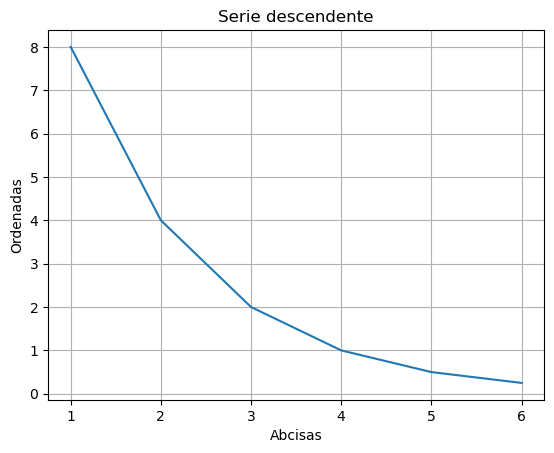

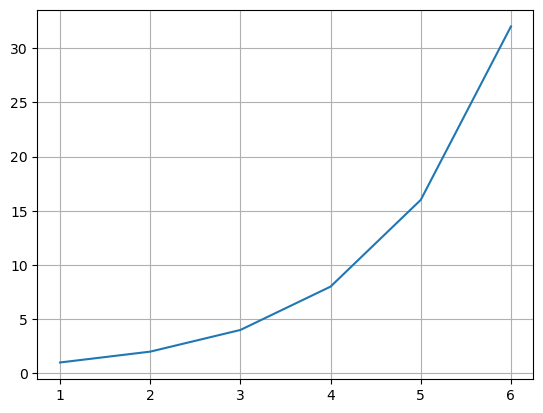

In [28]:
# Pruebas de funcionamiento:

representar_xxx_yyy([(1, 8), (2, 4), (3, 2), (4, 1), (5, 0.5), (6, 0.25)], ["Serie descendente", "Ordenadas", "Abcisas"])

representar_xxx_yyy([(1, 1), (2, 2), (3, 4), (4, 8), (5, 16), (6, 32)])

Lógicamente, hemos diseñado nuestro modelo para aplicarlo posteriormente a los datos que ya tenemos.
Concretamente, podemos aplicarlo también a la representación de los sueldos medios registrados en cada año.

[(2020, 179333.33), (2021, 147750.0), (2022, 175099.11)]


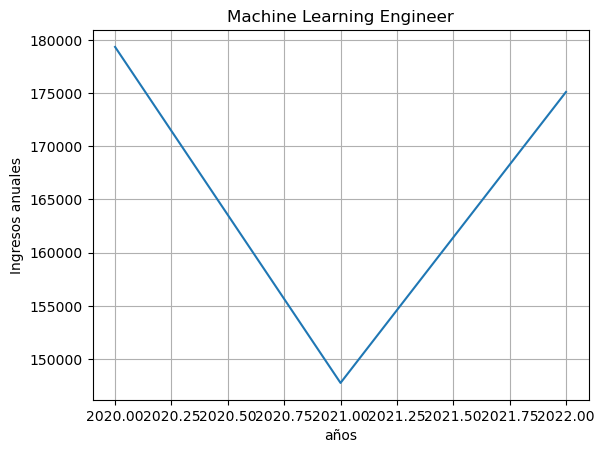

In [29]:
# Pruebas de funcionamiento:

annos = range(2020, 2023)
annos_sueldos = [(anno, average_salary_with_dict(Salarios, "Machine Learning Engineer", anno, "US")) for anno in list(annos)]

print(annos_sueldos)

representar_xxx_yyy(annos_sueldos, ["Machine Learning Engineer", "Ingresos anuales", "años"])

[(2020, 179333.33), (2021, 147750.0), (2022, 175099.11)]


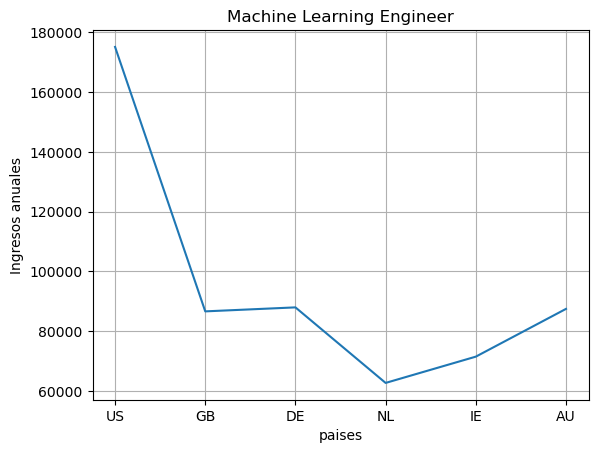

In [30]:
# Pruebas de funcionamiento:

paises = ["US", "GB", "DE", "NL", "IE", "AU"]
          
paises_sueldos = [(pais, average_salary_with_dict(Salarios, "Machine Learning Engineer", 2022, pais)) for pais in paises]

print(annos_sueldos)

representar_xxx_yyy(paises_sueldos, ["Machine Learning Engineer", "Ingresos anuales", "paises"])

## d.2) Histograma

Un gráfico más adecuado para este cometido es el histograma.

Las pruebas de funcionamiento te darán más información que las explicaciones que pueda yo dar aquí.  

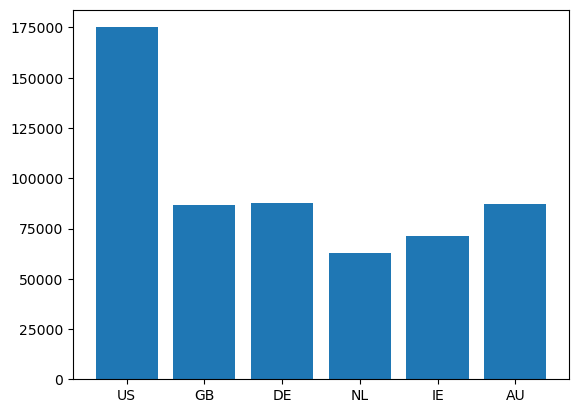

In [31]:
def representar_xxx_yyy_hist(puntos, labels=["", "", ""]):
    # Inicializa listas para las coordenadas x e y de los puntos.
    puntos_x = []
    puntos_y = []
    
    # Itera a través de los puntos proporcionados como una lista de tuplas (x, y).
    for x, y in puntos:
        puntos_x.append(x)  # Agrega la coordenada x a la lista puntos_x.
        puntos_y.append(y)  # Agrega la coordenada y a la lista puntos_y.
    
    # Crea un gráfico de barras utilizando plt.bar() con las coordenadas x e y.
    plt.bar(puntos_x, puntos_y)
    
    #plt.ylabel(labels[1])
    #plt.xlabel(labels[2])
    #plt.title(labels[0])
    
    # Muestra el gráfico de barras.
    plt.show()


representar_xxx_yyy_hist(paises_sueldos, ["Machine Learning Engineer", "Ingresos anuales", "paises"])


**Nota.** Vemos que la curva se comporta de un modo extraño, pues sufre una caída en 2001: esto es lo que indican efectivamente los datos.

# e) Operaciones con dataframes [2 puntos]

En este apartado, vamos a trabajar con tablas de la librería `pandas`, llamadas `dataframes`.

## e.1) Carga del dataframe

La primera operación que necesitamos es cargar el archivo de datos en una tabla, como se ve en el siguiente ejemplo.

In [32]:
def load_dataframe(archivo):
    # Utiliza la biblioteca pandas para leer un archivo CSV con el separador ";" y cargarlo en un DataFrame.
    archivo_csv = pandas.read_csv(archivo, sep=";")
    
    # Devuelve el DataFrame que contiene los datos del archivo CSV.
    return archivo_csv

In [33]:
# Comprobación

tabla_completa = load_dataframe(DatosPunComas)
tabla_completa

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


## e.2) Ajustes en nuestro archivo de datos

Deseamos ahora prescidir de la primera columna, pues únicamente da un número de orden de las filas, así como de las columnas relativas a la moneda local (`salary` y `salary currency`).

In [34]:
eliminadas = ['salary', 'salary_currency'] # Crea una lista que contiene los nombres de las columnas que se desean eliminar
tabla_completa = tabla_completa.iloc[:, 1:] # Mediante el comando de pandas iloc selecciona todas las filas y todas las columnas (menos la primera) del dataframe
tabla_abreviada = tabla_completa.drop(eliminadas, axis=1) # Crea un nuevo DataFrame que utiliza el método drop de pandas para eliminar las columnas cuyos nombres se encuentran en la lista "eliminadas". 
#El argumento axis=1 se utiliza para indicar que se deben eliminar columnas y no filas.

tabla_abreviada


,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,US,100,US,M


In [35]:
# Comprobación

tabla_abreviada

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,US,100,US,M


Comprobamos también los tipos de datos de las columnas, para asegurarnos de que los datos numéricos se han cargado como tales; de lo contrario, deberíamos cambiar su tipo. 

In [36]:
# Comprobación

tabla_abreviada.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

Aunque sólo sea a efectos didácticos, la columna de los porcentajes debería ser un real... Cambia esto, sólo para practicar.

In [37]:
tabla_abreviada['remote_ratio'] = tabla_abreviada['remote_ratio'].astype(float)

In [38]:
# Comprobación

tabla_abreviada.dtypes

work_year               int64
experience_level       object
employment_type        object
job_title              object
salary_in_usd           int64
employee_residence     object
remote_ratio          float64
company_location       object
company_size           object
dtype: object

In [39]:
# Comprobación

tabla_abreviada

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0.0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0.0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50.0,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0.0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50.0,US,L
...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,US,100.0,US,M
603,2022,SE,FT,Data Engineer,126000,US,100.0,US,M
604,2022,SE,FT,Data Analyst,129000,US,0.0,US,M
605,2022,SE,FT,Data Analyst,150000,US,100.0,US,M


También, la columna de la experiencia será más manejable si convertimos los código en números (así: "EN" -> 0, "MI" -> 1, "EX" -> 2, "SE" -> 3) y algo parecido haremos con el tamaño de las compañías ("S" -> 1, "EX: 0, "M" -> 2, "L" -> 3).

In [40]:
tabla_abreviada['experience_level'] = tabla_abreviada['experience_level'].replace({'EN': 0, 'MI': 1, 'EX': 2, 'SE': 3})
tabla_abreviada['company_size'] = tabla_abreviada['company_size'].replace({'S': 1, 'EX': 0, 'M': 2, 'L': 3})

In [41]:
# Comprobación

tabla_abreviada

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,1,FT,Data Scientist,79833,DE,0.0,DE,3
1,2020,3,FT,Machine Learning Scientist,260000,JP,0.0,JP,1
2,2020,3,FT,Big Data Engineer,109024,GB,50.0,GB,2
3,2020,1,FT,Product Data Analyst,20000,HN,0.0,HN,1
4,2020,3,FT,Machine Learning Engineer,150000,US,50.0,US,3
...,...,...,...,...,...,...,...,...,...
602,2022,3,FT,Data Engineer,154000,US,100.0,US,2
603,2022,3,FT,Data Engineer,126000,US,100.0,US,2
604,2022,3,FT,Data Analyst,129000,US,0.0,US,2
605,2022,3,FT,Data Analyst,150000,US,100.0,US,2


In [42]:
def average_salary_with_dataframe(sueldos, puesto, ano, pais):
    # Filtra el DataFrame 'sueldos' para seleccionar las filas que cumplan con las condiciones dadas.
    tabla_filtrada = sueldos[(sueldos['job_title'] == puesto) & (sueldos['work_year'] == ano) & (sueldos['company_location'] == pais)]

    # Comprueba si el DataFrame filtrado no está vacío.
    if not tabla_filtrada.empty:
        # Calcula el salario promedio utilizando el método 'mean()' en la columna 'salary_in_usd'.
        sueldo_medio = tabla_filtrada['salary_in_usd'].mean()
        
        # Redondea el resultado a 2 decimales.
        return round(sueldo_medio, 2)
    else:
        # Si el DataFrame filtrado está vacío (ninguna fila cumple con las condiciones), devuelve 0.
        return 0

In [43]:
print(average_salary_with_dataframe(tabla_abreviada, "Data Scientist", 2020, "US"))

139067.25


Comprobamos que el resultado es el mismo que el que definimos usando el diccionario:

In [44]:
print(average_salary_with_dict(Salarios, "Data Scientist", 2020, "US"))

139067.25


## f) Un cálculo masivo con map-reduce [Resuelto]

En este apartado se ha de realizar un programa aparte que calcule, para cada país, el número de cada puesto de trabajo que tiene contratado, junto con el máximo sueldo de cada categoría pra dicho país con independencia de laño.

    C:\...> python puestos_trabajo.py -q ds_salaries.norm.csv

El programa funcionará necesariamente con la técnica map-reduce, que podemos poner en juego con la librería `mrjob`.

El funcionamiento del mismo se puede activar también desde aquí:

In [45]:
# Hagamos una llamada al programa de consola desde aquí:

! python puestos_trabajo2.py -q ds_salaries.norm.csv #He actualizado el py porque me daba error
#Al cambiar a la v3 me sale un error pero funciona igualmente (el archivo sueldos_maximos2.txt se genera correctamente).
#En la v2 no me salía ningún error

Traceback (most recent call last):
  File "C:\Users\frico\OneDrive\Escritorio\MÁSTER\01. PYTHON\P2 - proyecto de programación\-- data_science_salaries\ENTREGA\puestos_trabajo2.py", line 26, in <module>
    MRTotalesPuestosSalarios.run()
  File "C:\Users\frico\anaconda3\Lib\site-packages\mrjob\job.py", line 616, in run
    cls().execute()
  File "C:\Users\frico\anaconda3\Lib\site-packages\mrjob\job.py", line 687, in execute
    self.run_job()
  File "C:\Users\frico\anaconda3\Lib\site-packages\mrjob\job.py", line 636, in run_job
    runner.run()
  File "C:\Users\frico\anaconda3\Lib\site-packages\mrjob\runner.py", line 500, in run
    self._check_input_paths()
  File "C:\Users\frico\anaconda3\Lib\site-packages\mrjob\runner.py", line 1133, in _check_input_paths
    self._check_input_path(path)
  File "C:\Users\frico\anaconda3\Lib\site-packages\mrjob\runner.py", line 1146, in _check_input_path
    raise IOError(
OSError: Input path #He does not exist!


In [46]:
# Para que el resultado se almacene en un archivo:

! python puestos_trabajo2.py -q ds_salaries.norm.csv  > sueldos_maximos2.txt

Para que pueda yo ver tu programa cómodamente desde aquí, también se puede mostrar con un comando de la consola, anteponiendo el símbolo `!`. Observaciones:

- La instrucción siguiente está comentada para ocultar una solución mía.
  Tú debes suprimir el símbolo `#` del comentario
  para mostrar tu solución aquí.
- Desde mac o linux, se ha de usar el comando `cat`, en vez de `type`.

In [47]:
! type puestos_trabajo2.py

# -*- coding: utf-8 -*-
"""
Created on Wed Oct 25 19:32:46 2023

@author: frico
"""

from mrjob.job import MRJob

class MRTotalesPuestosSalarios(MRJob):
   
    def mapper(self, _, line):
        valores = line.split(',')
        if len(valores) == 11:  
            cargo, sueldo, pais = valores[3], valores[6], valores[9]
            try:
                sueldo = int(sueldo)  
                yield (cargo, pais), sueldo
            except ValueError:
                pass  

    def reducer(self, key, values):
        yield key, max(values)

if __name__ == '__main__':
    MRTotalesPuestosSalarios.run()


## f_bis) Un cálculo masivo con map-reduce [0.5 puntos]

<br>

<font color="blue">
Como la solución del apartado anterior se entregó por error mío, puedes, si lo deseas, inventar tú mismo un nuevo enunciado para ser resuelto con la técnica de *map-reduce*, y proponer luego una solución para el mismo. 
    
    En este caso lo que vamos a hacer será calcular cuántos empleados hay para cada puesto de trabajo en función del tamaño de la empresa. Un ejemplo de resultado obtenido será el siguiente: ["Director of Data Science","Grande"]	5
</font>

In [48]:
! python empleados_tamano.py -q ds_salaries.norm.csv

["3D Computer Vision Researcher","Mediana"]	1
["AI Scientist","Grande"]	2
["AI Scientist","Mediana"]	2
["AI Scientist","Pequena"]	3
["Analytics Engineer","Mediana"]	4
["Applied Data Scientist","Grande"]	5
["Applied Machine Learning Scientist","Grande"]	2
["Applied Machine Learning Scientist","Mediana"]	2
["BI Data Analyst","Grande"]	2
["BI Data Analyst","Mediana"]	2
["BI Data Analyst","Pequena"]	2
["Big Data Architect","Mediana"]	1
["Big Data Engineer","Grande"]	4
["Big Data Engineer","Mediana"]	2
["Big Data Engineer","Pequena"]	2
["Business Data Analyst","Grande"]	4
["Business Data Analyst","Mediana"]	1
["Cloud Data Engineer","Grande"]	1
["Cloud Data Engineer","Pequena"]	1
["Computer Vision Engineer","Mediana"]	4
["Computer Vision Engineer","Pequena"]	2
["Computer Vision Software Engineer","Mediana"]	1
["Computer Vision Software Engineer","Pequena"]	2
["Data Analyst","Grande"]	13
["Data Analyst","Mediana"]	76
["Data Analyst","Pequena"]	8
["Data Analytics Engineer","Grande"]	2
["Data A

In [49]:
! python empleados_tamano.py -q ds_salaries.norm.csv > numero_emp.txt

## g) Un apartado libre [0.5 puntos]

<br>

<font color="green">
Dejo este apartado a tu voluntad. Inventa tú mismo el enunciado y resuélvelo, mostrando algún aspecto de programación en Python no contemplado o alguna técnica o librería que no has puesto en juego en los apartados anteriores, relacionado con el análisis de datos y con este proyecto. He aquí dos o tres ejemplos posibles:

- Me he quedado un poco insatisfecho con el uso de pandas, que encuentro un poco escaso:
  este apartado puede poner en juego algunas algunas operaciones que no hemos visto
  en esta librería.
  
- El acabado de las figuras es algo rudimentario.
  en cambio, la librería Plotly me permite permitirte trazar figuras más
  profesionales, y una posibilidad sencilla es quizá
  importar los datos del archivo creado por el programa de map-reduce
  y representarlos gráficamente.
  
- La disponibilidad de datos de geolocalización puede permitirte alguna representación
  de la ubicación de los vehísulos registrados en su posición geográfica.
  
Estos ejemplos pueden servirte como pista, pero que no te limiten. Hay muchas otras posibilidades: geopandas, web scraping, etc.

En la evaluación, si este apartado está bien o muy bien, anota un 0,3 o 0,4. El 0,5 lo reservaremos para las situaciones en que se presente algo brillante, con alguna idea original o alguna técnica novedosa o complejidad especial o algún gráfico vistoso. Especialmente quien opta a un 9,5 o más, debe esmerarse en plantear este apartado a la altura de esa calificación.
</font>

<br>

### g.1) Diseño del gráfico

<br>

<font color="darkblue">
Utiliza las herramientas de la librería mpl_toolkits para diseñar un gráfico en 3D que relacione las variables de experiencia, tamaño de la empresa y salario en dólares, haciendo distinción por colores en alguna de ellas. Para trabajar con la tabla utilizaremos la librería pandas.
    
Cabe recordar que en apartados anteriores hemos descabezado la tabla cuando la normalizamos, además de cuatificar las columnas con las que vamos a trabajar. También hemos utilizado pandas para manipular la tabla. Elige si comenzar con la tabla normalizada y rebautizar las columnas o si comenzar con el dataframe y recuantificar los valores de las variables.
</font>

In [50]:
def grafico_3D(archivo):
    # Cargar el archivo CSV en un DataFrame de Pandas
    df = pandas.read_csv(archivo)

    # Filtrar y seleccionar las columnas relevantes
    df = df.iloc[:, [1, 6, 10]]  # Columnas 2, 7 y 11

    # Renombrar las columnas para mayor claridad
    df.columns = ["Experience", "Salary_USD", "Company_Size"] #Esto se hace porque al normalizar la tabla eliminamos la primera fila

    # Crear una figura 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Extraer las variables
    experience = df["Experience"]
    salary_usd = df["Salary_USD"]
    company_size = df["Company_Size"]

    # Definir colores para cada valor de "Experience"
    colors = {0: 'red', 1: 'orange', 2: 'yellow', 3: 'green'}

    # Crear el gráfico 3D con colores
    scatter = ax.scatter(experience, salary_usd, company_size, c=[colors.get(exp) for exp in experience], marker='o')

    # Etiquetas de los ejes
    ax.set_xlabel('Experience Level')
    ax.set_ylabel('Salary (USD)')
    ax.set_zlabel('Company Size')

    # Crear la leyenda con colores y etiquetas
    experience_labels = {0: "EN", 1: "MI", 2: "EX", 3: "SE"}

    custom_lines = [Line2D([0], [0], marker='o', color='w', label=f'Experience level: {experience_labels.get(i)}', markersize=8, markerfacecolor=colors.get(i)) for i in experience.unique()]

    ax.legend(handles=custom_lines, loc='upper left', bbox_to_anchor=(-0.2, 1), prop={'size': 8})

    # Mostrar el gráfico
    plt.show()

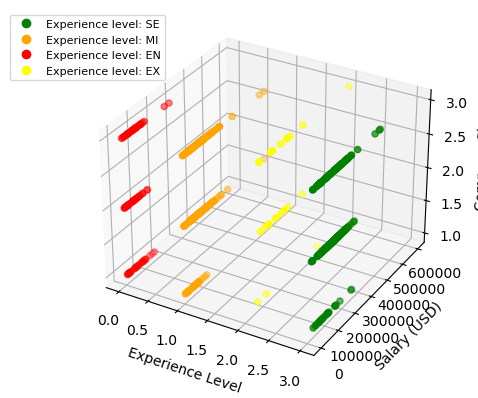

In [51]:
grafico_3D('ds_salaries.norm.csv')


### Datos personales

<br>

<font color="darkblue">

-   **Apellidos:** Rico del Valle
-   **Nombre:** Felipe
-   **Email:** fricodelvalle@gmail.com
-   **Fecha:** 29/10/2023

<br>

<font color="black">
    
### Ficha de autoevaluación

<br>

<font color="darkblue">
En esta sección se incluyen los comentarios del alumno.
</font>

<br>

<font color="darkblue">
    
|Apartado|Calificación|Comentario|
|-|-|-|
|a)  |2.0  / 2.0  |Completamente resuelto |
|b)  |2.0  / 2.0  |Completamente resuelto |
|c)  |1.5  / 2.0  |Algún resultado no me coincide |
|d)  |1.5 / 1.5  |Completamente resuelto |
|e)  |1.5  / 1.5  |Completamente resuelto |
|f)  |0.25  / 0.5  |No lo acabo de entender |
|g)  |0.3  / 0.5  |He logrado el correcto funcionamiento |
|**Total** |**9.05** / 10.0|**Notable**|
</font>

<br>

<font color="black">
   
### Ayuda recibida y fuentes utilizadas
    
</font>

<br>


<br>

<font color="darkblue">
    
Me he apoyado en la documentación facilitada por el profesor con comentarios realizados por mi en amarillo sobre algunos de los PDFs. He accedido a algunos de los links que se comparten al final de cada vídeo, especialmente a las páginas oficiales de las librerías que más hemos usado: pandas y matplotlib. 
También he consultado algún PDF y vídeo de un curso de Python que realicé recientemente en Udemy.

</font>

<br>

In [52]:
# Esta celda se ha de respetar: está aquí para comprobar el funcionamiento de algunas funciones por parte de tu profesor
